# Temp Data Analysis


These are essentials for running the program. This Notebook is for analyzing temperature data from RCP8.5 projections.
The csv of data being ran should have year values in the first column headed year. This is essential for the program to run properly.

In [84]:
#initiate Model
using CSV
using DataFrames
using Plots
using KernelDensity


After initiating the packages we will use we need to open and read the data.

In [85]:
dft85 = CSV.read("updated_projections_temperature_RCP85_sneasybrick.csv", DataFrame)
dft60 = CSV.read("updated_projections_temperature_RCP60_sneasybrick.csv", DataFrame)
dft45 = CSV.read("updated_projections_temperature_RCP45_sneasybrick.csv", DataFrame)
dft26 = CSV.read("updated_projections_temperature_RCP26_sneasybrick.csv", DataFrame)
dfg45 = CSV.read("updated_projections_gmsl_RCP45_sneasybrick.csv", DataFrame)

Row,year,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,⋯
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,1850,-0.121065,-0.0916471,-0.150356,-0.220757,-0.113611,-0.114437,-0.145494,-0.170422,-0.0307211,-0.115469,-0.177744,-0.164734,-0.065634,-0.138812,-0.150491,-0.0977096,-0.108486,-0.1011,-0.0576487,-0.216646,-0.115148,-0.15253,-0.150066,-0.19435,-0.0890795,-0.195812,-0.158888,-0.163136,-0.141945,-0.0731732,-0.0816678,-0.150779,-0.147764,-0.171017,-0.151125,-0.171168,-0.0626416,-0.186222,-0.0941691,-0.139118,-0.108298,-0.108143,-0.0848826,-0.195701,-0.144249,-0.165266,-0.112202,-0.253694,-0.0616491,-0.0737471,-0.169599,-0.14515,-0.0867371,-0.144251,-0.109609,-0.0406924,-0.142701,-0.227706,-0.141851,-0.19282,-0.161234,-0.137556,-0.190398,-0.0256423,-0.169422,-0.138038,-0.206872,-0.0468726,-0.218088,-0.206651,-0.126465,-0.181179,-0.0799225,-0.113478,-0.164053,-0.0978829,-0.124112,-0.0906519,-0.0631163,-0.121718,-0.166771,-0.109261,-0.0619065,-0.184532,-0.168049,-0.143777,-0.0740593,-0.184987,-0.112817,-0.192795,-0.116915,-0.0890508,-0.104839,-0.107691,-0.13807,-0.12154,-0.160229,-0.118873,-0.0389962,⋯
2,1851,-0.134155,-0.162546,-0.150067,-0.139754,-0.185283,-0.140513,-0.0747012,-0.169301,-0.0634721,-0.126003,-0.160307,-0.139593,-0.100197,-0.157093,-0.125311,-0.0782771,-0.172862,-0.101338,-0.117634,-0.18286,-0.167366,-0.173575,-0.125194,-0.180503,-0.109031,-0.131785,-0.168808,-0.122148,-0.154607,-0.0832413,-0.0676979,-0.199544,-0.179746,-0.169632,-0.0995472,-0.169368,-0.103337,-0.165958,-0.145259,-0.191095,-0.147349,-0.127263,-0.109792,-0.163777,-0.137671,-0.146642,-0.182861,-0.142021,-0.0486203,-0.111042,-0.180291,-0.155755,-0.0334422,-0.143993,-0.0807306,-0.0707102,-0.128963,-0.168145,-0.152227,-0.159285,-0.170427,-0.115531,-0.147109,-0.0675292,-0.155504,-0.138575,-0.170238,-0.0957869,-0.164029,-0.132965,-0.111853,-0.170248,-0.163486,-0.0652386,-0.210733,-0.0716018,-0.163621,-0.123972,-0.121254,-0.171883,-0.129161,-0.0949926,-0.120743,-0.164482,-0.137393,-0.111679,-0.128214,-0.18181,-0.131905,-0.168968,-0.206399,-0.070875,-0.16118,-0.143894,-0.136473,-0.163111,-0.136194,-0.0877524,-0.0840533,⋯
3,1852,-0.177911,-0.187131,-0.121445,-0.154952,-0.200911,-0.182576,-0.117307,-0.156735,-0.0620693,-0.122333,-0.136026,-0.130683,-0.0833973,-0.155052,-0.154389,-0.0780566,-0.189827,-0.115199,-0.141229,-0.173727,-0.166804,-0.167419,-0.12105,-0.133519,-0.145718,-0.148083,-0.153169,-0.102883,-0.173407,-0.0747535,-0.0671696,-0.152608,-0.188724,-0.158043,-0.149151,-0.12402,-0.082393,-0.18788,-0.0936797,-0.186619,-0.133646,-0.0953581,-0.0945938,-0.141372,-0.107936,-0.175529,-0.170517,-0.146448,-0.0947304,-0.104141,-0.142441,-0.174306,-0.030688,-0.116848,-0.081252,-0.0713717,-0.155063,-0.172389,-0.167929,-0.126532,-0.124249,-0.123324,-0.182161,-0.047431,-0.171244,-0.214699,-0.123981,-0.108341,-0.194752,-0.136739,-0.0668502,-0.166291,-0.107017,-0.0911824,-0.136516,-0.0585

Open the respective components of sealevelrise csv's.

In [86]:
# GIS files
gis85 = CSV.read("dataFiles\\RCP85\\updated_projections_greenland_RCP85_sneasybrick.csv", DataFrame)
gis60 = CSV.read("dataFiles\\RCP60\\updated_projections_greenland_RCP60_sneasybrick.csv", DataFrame)
gis45 = CSV.read("dataFiles\\RCP45\\updated_projections_greenland_RCP45_sneasybrick.csv", DataFrame)
gis26 = CSV.read("dataFiles\\RCP26\\updated_projections_greenland_RCP26_sneasybrick.csv", DataFrame)

Row,year,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,⋯
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,1850,0.00182401,0.00874038,0.00238494,0.0107064,0.00832253,0.00657246,0.0048731,0.0113206,0.00214312,0.00333235,0.00102165,0.00491882,0.00397116,0.00807152,0.00111502,0.00637682,0.0129209,0.00206008,-0.000568941,0.00778147,0.00421076,0.00567624,0.00114788,0.00578251,0.00417165,0.00167064,0.000540981,0.00173733,0.0180198,0.00324906,0.00176615,0.00410445,0.0018197,-0.00229008,0.00197959,-0.00279036,0.00313449,0.0146764,0.000990848,2.2e-5,-0.000837066,0.0106449,0.00590704,0.0169262,0.00337598,0.00311476,0.0221814,-0.00149173,0.00580816,0.00282466,0.00798668,0.00245421,0.0129628,0.00727382,0.0038763,0.00438918,0.00304193,0.000632149,-0.00103743,0.00259792,0.00513483,0.0101797,0.00454626,0.00661925,0.000407377,0.0115876,0.00108821,0.000126558,0.000336485,0.00617823,0.0169262,0.0163441,0.00144736,0.00507226,0.0177677,0.00860852,5.57e-5,0.00381024,0.00469084,0.00251587,0.00360794,0.000249338,0.00565769,0.00130224,0.010389,0.00605703,0.00588376,0.00276034,0.00362981,0.00310979,0.00549076,0.0199193,-0.000860516,0.0100195,0.0107577,-0.00207295,0.00333444,0.00460556,0.00352173,⋯
2,1851,0.00207237,0.00816704,0.00229895,0.0102695,0.00867208,0.00678869,0.00486675,0.0101543,0.00215672,0.00350456,0.00142707,0.00480979,0.0033203,0.00801963,0.00154521,0.00597564,0.0121545,0.00197926,-0.000475151,0.00804506,0.00475052,0.00553682,0.00144268,0.0061947,0.0045235,0.00153637,0.00060407,0.00146303,0.0174777,0.00326948,0.00205005,0.00352622,0.00191249,-0.00276269,0.0015887,-0.00227301,0.00267597,0.0150209,0.000912591,9.22e-5,-0.00103331,0.0109926,0.00584972,0.0167085,0.00288526,0.00300317,0.0223642,-0.00162379,0.0056878,0.00100646,0.00785755,0.00230381,0.0127323,0.00726692,0.00337141,0.00478506,0.00288101,0.000411875,-0.000962585,0.00243096,0.00499188,0.0103832,0.00494101,0.00690638,0.00111143,0.0115258,0.000768818,0.00134762,6.3e-5,0.00620212,0.0166826,0.0158059,0.00154633,0.00525138,0.0169797,0.00767937,2.92e-5,0.00363048,0.00562604,0.00266485,0.00404217,0.000335039,0.00531689,0.00134592,0.0102477,0.00606051,0.00626256,0.00293585,0.00408962,0.00307455,0.00571953,0.0196888,-0.000736843,0.00904579,0.0105414,-0.00221738,0.00324332,0.00471787,0.00217597,⋯
3,1852,0.00157665,0.00909992,0.0025374,0.0104852,0.00859344,0.0060024,0.00460902,0.0110255,0.00194711,0.00316578,0.00150741,0.00456824,0.00361563,0.00823109,0.000560832,0.00601425,0.0126032,0.00182035,-0.0001145,0.00725142,0.00394938,0.00562327,0.0010976,0.00608766,0.00457325,0.00140875,0.000545973,0.00173651,0.017256,0.00303625,0.0018,0.00363699,0.00161229,-0.00252746,0.00190094,-0.00247382,0.00226224,0.0146761,0.000549061,0.000208551,-0.000731418,0.0109189,0.00594427,0.0161699,0.00333648,0.00292666,0.0220506,-0.00143178,0.00554962,0.00226449,0.00784801,0.0025566,0.0128592,0.00689819,0.00393991,0.00469428,0.00269497,7.81e-5,

In [87]:
# AIS files
ais85 = CSV.read("dataFiles\\RCP85\\updated_projections_antarctic_RCP85_sneasybrick.csv", DataFrame)
ais60 = CSV.read("dataFiles\\RCP60\\updated_projections_antarctic_RCP60_sneasybrick.csv", DataFrame)
ais45 = CSV.read("dataFiles\\RCP45\\updated_projections_antarctic_RCP45_sneasybrick.csv", DataFrame)
ais26 = CSV.read("dataFiles\\RCP26\\updated_projections_antarctic_RCP26_sneasybrick.csv", DataFrame)

Row,year,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,⋯
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,1850,-0.0925006,-0.0592517,-0.106503,-0.187745,-0.0886338,-0.0885305,-0.0978667,-0.140261,0.0132149,-0.0690996,-0.146949,-0.125112,-0.0170326,-0.105349,-0.131647,-0.0391241,-0.113041,-0.0575587,-0.082644,-0.151519,-0.107527,-0.0960121,-0.124816,-0.158923,-0.0501317,-0.128461,-0.143094,-0.0390042,-0.105615,-0.0635001,0.00847727,-0.132213,-0.134134,-0.104288,-0.113123,-0.123711,-0.0126571,-0.127698,-0.0390256,-0.0852421,-0.0812763,-0.054055,-0.0162161,-0.166691,-0.0831743,-0.135365,-0.0889499,-0.169054,-0.0626186,-0.0761751,-0.133879,-0.0835595,-0.0674364,-0.0935759,-0.0764597,-0.0172811,-0.0864325,-0.160983,-0.130501,-0.145683,-0.110365,-0.0617335,-0.150999,0.0069713,-0.120969,-0.104217,-0.150703,-0.0180929,-0.152371,-0.1125,-0.0979636,-0.178946,-0.0487514,-0.0780102,-0.130251,-0.0466718,-0.123032,-0.0765439,0.00591416,-0.0676743,-0.099473,-0.10745,-0.0563294,-0.116769,-0.0895555,-0.135143,-0.053168,-0.144527,-0.0856164,-0.170095,-0.0908015,-0.050195,-0.10413,-0.111995,-0.0965388,-0.109539,-0.150825,-0.0857016,0.0404196,⋯
2,1851,-0.133293,-0.109977,-0.0878932,-0.14272,-0.127728,-0.139282,-0.0541918,-0.131193,-0.0267928,-0.0703367,-0.104773,-0.121732,-0.0596052,-0.145746,-0.101504,-0.0589966,-0.131553,-0.0671141,-0.0863233,-0.146317,-0.133029,-0.118856,-0.0785979,-0.127515,-0.0809024,-0.131116,-0.132172,-0.0527042,-0.115288,-0.041752,-0.0409498,-0.14232,-0.137886,-0.122036,-0.0899322,-0.120691,-0.0586649,-0.1514,-0.07018,-0.124163,-0.11375,-0.0657354,-0.0560427,-0.126965,-0.0790077,-0.122963,-0.130066,-0.125183,-0.0413313,-0.0572937,-0.13005,-0.12687,-0.0289243,-0.0815559,-0.0427572,-0.0504732,-0.122677,-0.125192,-0.117143,-0.111743,-0.131346,-0.0885139,-0.127498,-0.0372102,-0.124291,-0.147376,-0.112602,-0.0584046,-0.12865,-0.112163,-0.0597085,-0.163347,-0.0981629,-0.0573277,-0.138365,-0.0344809,-0.122457,-0.112839,-0.0480052,-0.0791593,-0.0635167,-0.0794989,-0.0727384,-0.131945,-0.0618305,-0.107094,-0.07361,-0.133508,-0.0806505,-0.136739,-0.131273,-0.0238173,-0.130576,-0.13412,-0.100854,-0.107492,-0.135488,-0.0441503,-0.00895249,⋯
3,1852,-0.130993,-0.109674,-0.0872348,-0.140307,-0.127618,-0.138537,-0.0536611,-0.130467,-0.0284067,-0.0706856,-0.104038,-0.120641,-0.058744,-0.14294,-0.0999555,-0.0591762,-0.130089,-0.067396,-0.0854432,-0.145412,-0.132117,-0.117867,-0.0774953,-0.126028,-0.0802715,-0.129189,-0.12941,-0.0521829,-0.11536,-0.0417175,-0.0411037,-0.141315,-0.13828,-0.121621,-0.0889819,-0.120331,-0.0571984,-0.150806,-0.0702781,-0.124177,-0.112371,-0.0656584,-0.0550964,-0.126505,-0.0790356,-0.122138,-0.130479,-0.123804,-0.0408961,-0.0578546,-0.127877,-0.125634,-0.0279112,-0.0813208,-0.042574,-0.050911,-0.122025,-0.124194,-0.116967,-0.110826,-0.130767,-0.0883507,-0.126108,-0.0368126,-0.122628,-0.146713,-0.110482,-0.0584961,-0.127912,-0.111561,-0.05

In [88]:
# LWS files
lws85 = CSV.read("dataFiles\\RCP85\\updated_projections_landwater_storage_sl_RCP85_sneasybrick.csv", DataFrame)
lws60 = CSV.read("dataFiles\\RCP60\\updated_projections_landwater_storage_sl_RCP60_sneasybrick.csv", DataFrame)
lws45 = CSV.read("dataFiles\\RCP45\\updated_projections_landwater_storage_sl_RCP45_sneasybrick.csv", DataFrame)
lws26 = CSV.read("dataFiles\\RCP26\\updated_projections_landwater_storage_sl_RCP26_sneasybrick.csv", DataFrame)

Row,year,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,⋯
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,1850,0.000120899,0.000269278,0.000265643,0.000107223,8.19e-5,0.000500206,0.000474055,0.000382363,3.67e-5,0.000319368,0.00023216,0.000403111,0.000441371,0.000176444,0.000346009,0.000320561,0.000131438,0.000459779,-9.57e-7,6.68e-5,0.000118051,0.000224702,0.000401372,0.000240852,0.000418196,0.000335345,0.00032229,5.83e-5,0.000341317,0.000450537,0.000290351,0.000496292,-4.15e-5,0.000293103,0.000334731,0.000406669,0.000448235,0.000204304,0.000237062,5.06e-5,9.75e-5,0.00053903,0.000390452,0.000210137,0.000282734,0.000197035,0.000441505,0.000370941,7.39e-5,0.000234489,0.000537332,0.000192456,0.000318275,0.00033535,-4.88e-5,0.000386466,0.000393919,0.000281124,0.000337329,-0.00010972,0.000484464,0.000165343,-1.23e-5,0.00035225,0.000598597,0.000115468,0.000263747,0.00042366,0.000517926,0.000198992,9.15e-5,0.000385199,0.0003475,0.000153699,0.000601126,-1.58e-5,0.000122407,0.000551765,0.00027193,0.000573058,-3.49e-5,0.000228144,0.000587316,0.000225861,4.7e-5,0.000374832,0.000289085,0.000389978,0.000316378,0.000541783,0.000416339,-1.85e-5,0.000152546,0.00014532,0.000424737,0.00038033,0.000390163,0.000506841,0.00024262,⋯
2,1851,0.00049876,0.000298085,0.00049199,0.000317162,0.00046652,0.000126204,0.000331077,0.000729187,0.000200673,-8.02e-5,0.000384163,0.000461049,0.000121201,0.000440305,0.0003288,1.33e-5,0.000648319,0.000104135,0.000413559,0.000193307,0.0001492,0.000449723,0.000485476,0.000159261,0.000522483,0.000165759,0.000277819,0.000257526,0.000258249,0.00027089,6.75e-5,0.000286714,0.000408454,2.43e-5,0.000340108,-0.000253239,0.000566529,0.000270297,0.000224372,0.000371336,0.000300885,0.000285084,0.000203034,0.000328223,-2.03e-7,0.000405579,0.000190865,0.000139374,0.000256581,0.000334812,0.000427497,0.000329893,0.000458936,0.000321971,0.000538993,0.000458397,0.000280053,0.000306262,0.000315418,0.000102159,0.000340696,0.000476663,0.000547615,0.000140294,0.000470239,0.000381887,-3.53e-5,0.000160071,0.000378044,0.000223069,0.000420636,0.000349501,8.43e-5,0.000242417,0.00041024,0.000305903,0.000442113,0.000246251,0.000360229,0.000401548,0.00048531,0.000365425,0.000622444,0.000238549,0.000302286,-1.54e-5,0.000535887,7.14e-5,9.74e-5,0.000355942,0.000155865,0.000117124,0.000130492,3.5e-6,0.000529996,0.000188582,0.000410665,0.0005649,0.00044734,⋯
3,1852,0.000370157,0.000393784,0.000216837,0.000254684,0.00032109,0.000308091,0.00016122,0.00034844,0.000458811,0.00046136,0.000461359,0.00020078,0.000368332,0.000296628,0.000280473,0.000465998,0.000330798,0.000391596,0.000550605,0.000595877,0.000262297,0.000343231,0.000160018,0.000366584,0.000173692,0.000374368,0.000313835,0.000460401,0.000219382,0.000257637,0.000417563,0.00052316,1.26e-5,0.000211621,0.000386474,0.000300409,0.000526282,0.000343481,0.000222363,0.000426927,0.000338731,0.000377058,0.000341371,0.000264005,0.000

In [89]:
# GIC files
gic85 = CSV.read("dataFiles\\RCP85\\updated_projections_glaciers_RCP85_sneasybrick.csv", DataFrame)
gic60 = CSV.read("dataFiles\\RCP60\\updated_projections_glaciers_RCP60_sneasybrick.csv", DataFrame)
gic45 = CSV.read("dataFiles\\RCP45\\updated_projections_glaciers_RCP45_sneasybrick.csv", DataFrame)
gic26 = CSV.read("dataFiles\\RCP26\\updated_projections_glaciers_RCP26_sneasybrick.csv", DataFrame)

Row,year,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,⋯
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,1850,-0.0316366,-0.0315209,-0.0300618,-0.0292869,-0.0234604,-0.0258397,-0.0348879,-0.0254233,-0.0294565,-0.027508,-0.029558,-0.0276991,-0.0262348,-0.0273346,-0.0292927,-0.0256286,-0.0267338,-0.0282687,-0.0308234,-0.0275269,-0.0303565,-0.0293264,-0.0304473,-0.0287776,-0.0305569,-0.0305277,-0.0293257,-0.0337431,-0.0287949,-0.0277895,-0.0267163,-0.0272368,-0.0277403,-0.0278254,-0.0289526,-0.0317731,-0.023776,-0.0280528,-0.0249425,-0.0263962,-0.0269661,-0.0313451,-0.0291327,-0.0297608,-0.0290011,-0.0281699,-0.0276635,-0.0291582,-0.0301008,-0.0270442,-0.0274451,-0.0265854,-0.0262416,-0.0296807,-0.0281932,-0.0351473,-0.0302213,-0.0295919,-0.0279127,-0.033602,-0.0274179,-0.0277696,-0.03319,-0.0295624,-0.0289282,-0.0326283,-0.0197413,-0.0242247,-0.0262556,-0.0269751,-0.0315778,-0.0283336,-0.0269863,-0.0241451,-0.024338,-0.0288017,-0.0268987,-0.0311565,-0.0332496,-0.0285222,-0.0255823,-0.0300306,-0.0298073,-0.0295379,-0.0294936,-0.0273604,-0.0283548,-0.0343776,-0.0281966,-0.0283473,-0.0276941,-0.0290356,-0.032493,-0.0301741,-0.0284669,-0.0268794,-0.0327114,-0.0295331,-0.0302246,⋯
2,1851,-0.0274513,-0.0326891,-0.0299924,-0.0271957,-0.0259329,-0.0284968,-0.0341129,-0.0269095,-0.0326432,-0.0219376,-0.0284464,-0.0315747,-0.0299779,-0.0266696,-0.0291463,-0.028008,-0.0293205,-0.0282195,-0.0313627,-0.0301293,-0.0261503,-0.0303424,-0.0299724,-0.0272109,-0.0272298,-0.0279937,-0.0268309,-0.0339317,-0.0300677,-0.0282514,-0.0275816,-0.0288012,-0.0259518,-0.0327706,-0.0313451,-0.0329286,-0.0289691,-0.0254355,-0.0261523,-0.0274959,-0.0290859,-0.0319696,-0.0307391,-0.0285514,-0.0285113,-0.03103,-0.0245332,-0.0325067,-0.0298555,-0.0301116,-0.0257731,-0.0294312,-0.0275065,-0.0337163,-0.0303098,-0.0315979,-0.0311494,-0.0347309,-0.0282232,-0.0334179,-0.0308179,-0.0310004,-0.0293665,-0.0333924,-0.026836,-0.0331707,-0.0234175,-0.0262175,-0.030387,-0.0263977,-0.0310628,-0.0307975,-0.0268604,-0.0255794,-0.0273495,-0.0300191,-0.0277287,-0.0317287,-0.0342095,-0.0282604,-0.0238635,-0.0271438,-0.0301965,-0.0273184,-0.0290001,-0.0284318,-0.0276488,-0.0343262,-0.0241872,-0.0299505,-0.0229161,-0.0285283,-0.0306904,-0.0255398,-0.0311309,-0.0285402,-0.029472,-0.0295022,-0.0247032,⋯
3,1852,-0.025609,-0.0328992,-0.0267887,-0.0262744,-0.0256421,-0.0262822,-0.033056,-0.0262962,-0.025676,-0.0314912,-0.0316257,-0.0321343,-0.0258616,-0.0294615,-0.0312988,-0.0281903,-0.0309701,-0.0295384,-0.0250646,-0.0315959,-0.03109,-0.0278802,-0.0276371,-0.032022,-0.0275722,-0.0305334,-0.0274336,-0.0312985,-0.0282492,-0.0280838,-0.030493,-0.0261662,-0.0272949,-0.032092,-0.0294879,-0.029645,-0.0280089,-0.023321,-0.0261088,-0.0290579,-0.0292065,-0.0307285,-0.0289615,-0.0316933,-0.0263144,-0.0283709,-0.0242086,-0.0323566,-0.0302168,-0.0251981,-0.0293834,-0.0304251,-0.0272962,-0.0240108,-0.0298189,-0.028198,-0.0263

In [90]:
# TE files
te85 = CSV.read("dataFiles\\RCP85\\updated_projections_thermal_RCP85_sneasybrick.csv", DataFrame)
te60 = CSV.read("dataFiles\\RCP60\\updated_projections_thermal_RCP60_sneasybrick.csv", DataFrame)
te45 = CSV.read("dataFiles\\RCP45\\updated_projections_thermal_RCP45_sneasybrick.csv", DataFrame)
te26 = CSV.read("dataFiles\\RCP26\\updated_projections_thermal_RCP26_sneasybrick.csv", DataFrame)

Row,year,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,⋯
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,1850,0.0227005,0.0131938,0.0332008,-0.0035008,0.0230374,-0.0117678,0.0187602,0.00887515,-0.0178687,0.00101321,0.00934179,0.0435676,-0.037683,-0.0201504,0.0377008,0.0240619,0.0457134,0.0141789,0.00708843,0.00507343,-0.0375809,-0.019016,-0.00302912,0.0231058,-0.0481778,0.00478629,-0.0150074,-0.0409779,0.0295779,0.0421613,0.0167979,-0.0234762,-0.0408617,0.0256427,0.023044,-0.0306744,-0.0136032,-0.025845,0.038946,-0.0206836,0.006431,8.24e-5,0.00315497,0.0326341,-0.015068,0.00210088,-0.0179501,-0.0309719,-0.0331044,0.0391193,-0.024225,0.0245688,0.0160355,0.0253622,0.0248517,0.00723821,0.037172,-0.00530509,-0.0123202,0.0319672,0.0340078,0.01255,-0.0409602,-0.00425895,0.00300298,0.0187061,-0.0352274,-0.0438027,0.034974,-0.00752335,-0.0165473,-0.0365918,-0.022084,0.0174211,-0.0126938,-0.0180633,0.00287071,0.0294764,-0.0206506,0.0345616,0.0119561,0.0373978,-0.0362339,0.0427932,-0.030829,-0.0122564,-0.0319476,0.0187005,-0.031449,-0.0234198,0.0323051,-0.0177504,0.00668436,-0.00375302,-0.0088625,-0.000558067,0.00953175,-0.0373185,-0.0169966,⋯
2,1851,0.023083,0.0137543,0.0335027,-0.00315398,0.0234456,-0.0114322,0.0191611,0.00932629,-0.0175512,0.00131142,0.00980213,0.0439187,-0.0374044,-0.0198834,0.0379463,0.0243539,0.0460208,0.0145409,0.00742568,0.00533764,-0.0372133,-0.0186214,-0.00261832,0.0234545,-0.0477161,0.00511625,-0.0146961,-0.0405471,0.0298922,0.0425512,0.0171464,-0.0231544,-0.0405544,0.0260203,0.0234162,-0.0302972,-0.0132299,-0.0254112,0.0394291,-0.0203294,0.00685103,0.000441189,0.00356005,0.0330045,-0.0147334,0.00251187,-0.0175946,-0.0306697,-0.0327935,0.0394595,-0.0238663,0.0249663,0.0163914,0.0257694,0.0252363,0.00766679,0.0375157,-0.00488788,-0.0119766,0.032436,0.0344218,0.0129108,-0.0405886,-0.00395839,0.0033872,0.0191016,-0.0348619,-0.0435141,0.0353176,-0.00708572,-0.016135,-0.0363877,-0.0216406,0.0177312,-0.0122432,-0.0177806,0.00332805,0.0299442,-0.0201842,0.0350377,0.0122539,0.0377572,-0.0358743,0.0431959,-0.0304222,-0.0118691,-0.0316111,0.0190285,-0.0309167,-0.0229989,0.0326491,-0.0173948,0.00698576,-0.00345834,-0.00840549,-0.000263582,0.00997798,-0.0368882,-0.0166713,⋯
3,1852,0.0234567,0.0142628,0.0338091,-0.00280312,0.0238427,-0.0110971,0.0195265,0.00974732,-0.0172395,0.0015979,0.0102496,0.0442643,-0.0371312,-0.0196099,0.0381935,0.0246387,0.0463289,0.014892,0.00774581,0.00560366,-0.0368532,-0.0182473,-0.00221233,0.0237983,-0.0472941,0.00543788,-0.0143867,-0.0401411,0.030197,0.0429345,0.0174872,-0.0228439,-0.04025,0.0263799,0.0237835,-0.0299365,-0.0128746,-0.0249989,0.0398976,-0.0199873,0.0072521,0.000792663,0.00393402,0.0333644,-0.0144165,0.00290799,-0.0172407,-0.0303684,-0.0324923,0.0397916,-0.0235188,0.0253425,0.0167368,0.026148,0.025613,0.00807798,0.0378538,-0.0044873,-0.0116352,0.0328782,0.034811,0.0132626,-0.0402324,-0.00367395,0.00376

## Primary Run

First we set our index variables.

In [91]:
colr = collect(2:ncol(dft85))
rowr = collect(1:nrow(dft85))

451-element Vector{Int64}:
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10
   ⋮
 443
 444
 445
 446
 447
 448
 449
 450
 451

Then we solve for when find the rows within the timeframe of the years selected.

In [92]:
#create array list to house all years within the norm period
normp = []
#set normalization period
for r in rowr
    if 1850 <= dft85[r,:year] <= 1900
        push!(normp, r)
    end
end 

Next, we index through each temperature of the n ormalization period for each trial and collect their value.

In [93]:
# Set the index and array to solve for normalized value
sarray = []
i = 0

# Add each value to a sum
for r in normp
    for c in colr
        push!(sarray, dft85[r, c])
        i += 1
    end
end
sarray[1]

-0.031582453

Next we find the mean.

In [94]:
# Collect the sum
summ = 0
for t in collect(1:i)
    summ += sarray[t]
end
# Divide by the number of terms(i)
avg = summ / i


-0.03030344187909853

Next we noramlize the data for each instance.

In [95]:
# change the value for each instance after the first 50 years
for r in rowr
    for c in colr
        dft85[r, c] = (dft85[r, c] - avg)
    end
end
dft85

Row,year,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,⋯
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,1850,-0.00127901,0.0358651,0.00658736,0.00310391,-0.156565,-0.232298,0.0244832,-0.0778929,0.0253276,0.187936,0.0632288,0.0185737,-0.0477839,-0.12838,0.126856,-0.303417,0.043422,-0.153661,-0.0928713,0.212241,-0.196354,-0.225047,-0.204856,-0.0420353,0.031684,0.00931942,0.189716,-0.268691,-0.155151,0.0266548,-0.230653,-0.120558,-0.0454255,-0.194665,-0.148334,0.011099,0.0124601,0.0374671,0.144434,-0.0242696,0.155668,-0.00620622,0.0560844,-0.345756,-0.104353,-0.138873,0.0125091,-0.172969,0.00882713,0.0746064,-0.00508793,-0.113978,0.189187,-0.144869,0.0290631,-0.112723,-1.69641e-5,-0.0467699,0.021851,-0.124746,0.0946669,-0.0554121,0.101555,-0.00826186,0.0752535,-0.0660762,0.180156,0.267272,-0.00919001,0.138356,0.0346889,0.298325,-0.139498,-0.187392,-0.00310008,-0.012968,-0.0215372,0.0699116,0.000179953,-0.202058,0.16192,-0.115986,0.0887452,0.0447463,0.0350296,-0.161291,0.00736523,-0.0199946,0.0684137,0.0440757,0.125476,-0.0890807,-0.0286312,-0.224802,0.020553,-0.0209601,-0.0906909,0.0683625,0.100629,⋯
2,1851,0.0845733,-0.111099,0.0312623,-0.0815236,-0.102852,-0.00851698,-0.199791,-0.00483495,0.0503991,0.0782521,-0.0363666,0.210851,-0.112583,-0.0849339,-0.114513,-0.0131476,-0.0562172,0.133431,-0.0109924,-0.142479,0.0320473,-0.0733278,-0.125961,-0.150361,-0.106962,0.140841,-0.053501,-0.122074,0.0491877,0.0394288,0.0793141,0.27556,0.107224,0.0494065,-0.0982043,0.0555547,0.129098,-0.0138965,0.213459,0.060228,0.208057,0.187504,0.127109,0.0419113,-0.0592576,0.215255,-0.0760446,-0.0377472,0.0923466,0.12351,0.206616,0.154361,0.106259,0.116615,-0.0417101,-0.138767,0.0250416,-0.162047,0.0281971,0.210899,0.0489131,0.0255471,0.0122194,-0.103204,0.12267,0.222288,-0.0408698,0.100867,-0.237198,-0.226117,0.074668,0.0885353,0.255235,-0.373779,-0.0558185,0.132027,0.192179,-0.058178,0.0238914,-0.132477,-0.0719044,0.0591793,0.356787,0.109591,0.164513,-0.0627123,0.143743,0.0521044,0.0826461,0.139443,0.114011,0.106106,0.18857,-0.108458,0.248456,0.414415,-0.0239451,0.0144482,0.264923,⋯
3,1852,0.0406614,-0.0790225,0.0706668,0.0801665,0.144949,-0.0701197,-0.00965145,-0.130498,0.0736746,0.0512229,-0.0448693,-0.139508,0.0179973,0.0124866,0.190737,-0.228825,0.332906,0.172548,0.0776651,0.00568321,0.0136767,-0.0596782,0.0266632,0.130348,-0.130006,0.0584467,0.119106,0.0620339,0.293425,-0.0430635,0.0297134,0.0797209,0.195181,-0.178338,0.0709624,-0.0117298,0.0854815,0.00846759,0.149486,-0.0128581,0.161684,-0.103063,0.0590124,-0.160905,0.0273115,0.0237913,-0.225469,-0.100487,-0.159032,0.237835,-0.209879,0.099518,0.0564854,-0.0593627,0.15259,0.244781,-0.0603517,-0.0193528,0.283954,0.252759,0.0136159,0.136335,0.0609605,-0.00126869,0.0332318,-0.146745,-0.116449,0.0181442,0.0637925,-0.243152,-0.0983651,0.111741,-0.0729404,-0.0334264,0.108496,0.0887805,0.151247,0.220564,-0.0283644,-0.179567,0.

Now to prep for graphing we create a empty dict to hold all the results each year.

In [96]:
yearVals = Dict{Any, Any}()
print("Dict values = ", yearVals)

Dict values = Dict{Any, Any}()

Next we determine the year 2100 in the df.

In [97]:
#Set year we are looking for and initiate row
yr = 2100
rw = 0
#claculate what row we are looking for
for r in rowr
    if dft85[r,:year] == yr
        rw = r
    end
end
rw

251

Now we store all the values from that row into the yearVals Dict

In [98]:
x2100 = []
for c in colr
    push!(x2100, dft85[rw, c])
end
x2100

10000-element Vector{Any}:
 4.940058832879099
 3.2554046718790985
 4.472642827879098
 5.492420418879099
 4.192914710879099
 4.1722702778790985
 3.8777005718790987
 3.7875448228790987
 4.631302627879099
 3.8473599688790987
 ⋮
 4.2813712248790985
 3.9148311238790985
 4.829255460879098
 4.228298333879098
 3.7357581708790986
 4.682069538879099
 4.410863731879099
 4.9634468988790985
 5.348214252879099

Make the histogram.

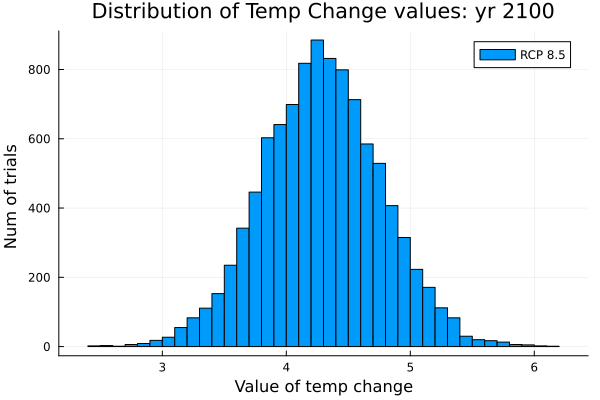

In [99]:

histogram(x2100, label = "RCP 8.5")
title!("Distribution of Temp Change values: yr 2100")
xlabel!("Value of temp change")
ylabel!("Num of trials ")
     

## Generalization of Primary

general function to do all of this.

In [100]:
function genp(dft, yr, ns, ne)
    #set boundaries
    colr = collect(2:ncol(dft))
    rowr = collect(1:nrow(dft))

    #create array list to house all years within the norm period
    normp = []
    #set normalization period
    for r in rowr
        if ns <= dft[r,:year] <= ne
            push!(normp, r)
        end
    end
    
    # Set the index and array to solve for normalized value
    sarray = []
    i = 0

    # Add each value to a sum
    for r in normp
        for c in colr
            push!(sarray, dft[r, c])
            i += 1
        end
    end

    # Collect the sum
    summ = 0
    for t in collect(1:i)
        summ += sarray[t]
    end
    # Divide by the number of terms(i)
    avg = summ / i

    # change the value for each instance
    for r in rowr
        for c in colr
            dft[r, c] = (dft[r, c] - avg)
        end
    end

    #initiate row
    rw = 0
    #claculate what row we are looking for
    for r in rowr
        if dft[r,:year] == yr
            rw = r
        end
    end

    x = []
    for c in colr
        push!(x, dft[rw, c])
    end

    return x
end

genp (generic function with 1 method)

run function with different rcps for same year, create variable to house result.

In [101]:
r85 = Vector{Float64}(genp(dft85, 2100, 1850, 1900))
r60 = Vector{Float64}(genp(dft60, 2100,1850, 1900))
r45 = Vector{Float64}(genp(dft45, 2100, 1850, 1900))
r26 = Vector{Float64}(genp(dft26, 2100,1850, 1900))



10000-element Vector{Float64}:
 1.624413884149715
 1.1803164581497152
 1.5905920441497152
 1.9778548161497151
 1.3842097341497153
 1.5281925911497152
 1.271143449149715
 1.3078168041497151
 1.4967489101497151
 1.086720076149715
 ⋮
 1.5454032971497151
 1.2045314441497152
 1.6423801601497152
 1.314110672149715
 1.289012369149715
 1.5490080611497152
 1.561420141149715
 1.4934662891497152
 1.8213158621497152

Create a gen function for historgrams

In [102]:
function histg(data, rcp, tyear, op)
    darray = []
    #initiate hist array
    for t in collect(1:length(data))
        push!(darray, data[t])
    end

    #make histogram
    graph = histogram(darray, label = string("RCP ",rcp), opacity = op)
    title!(string("Distribution of Temp Change values: yr ",tyear))
    xlabel!("Value of temp change")
    ylabel!("Num of trials ")
    return graph
end

histg (generic function with 1 method)

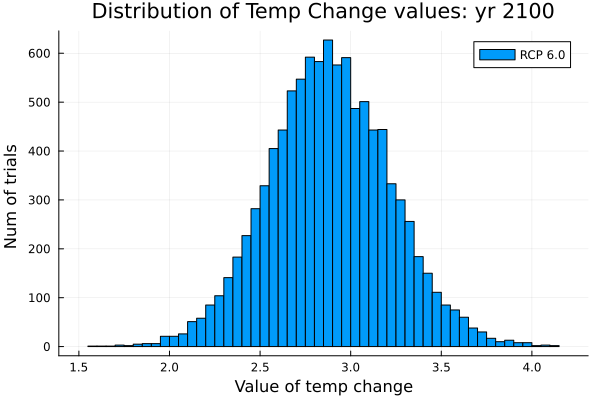

In [103]:

h4 = histg(r45, 4.5, 2100, 1)
h8 = histg(r85, 8.5, 2100, 1)
h2 = histg(r26, 2.6, 2100, 1)
h6 = histg(r60, 6.0, 2100, 1) 

In [104]:
k26 = kde(r26)
k45 = kde(r45)
k85 = kde(r85)
k60 = kde(r60)

UnivariateKDE{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}}}(1.3968201324426779:0.001436560048094691:4.33745855089251, [6.824505417446503e-7, 6.772175306091199e-7, 6.815685467120858e-7, 6.955152002108278e-7, 7.191693457420101e-7, 7.527432909215648e-7, 7.965506236828901e-7, 8.510076443535297e-7, 9.166354031364676e-7, 9.940623332260756e-7  …  1.3337470506878668e-6, 1.2101480675250076e-6, 1.1019358191078493e-6, 1.0079914701463522e-6, 9.273294660563924e-7, 8.590912660491612e-7, 8.025397512951421e-7, 7.570542965087967e-7, 7.221265095579132e-7, 6.973566232543887e-7])

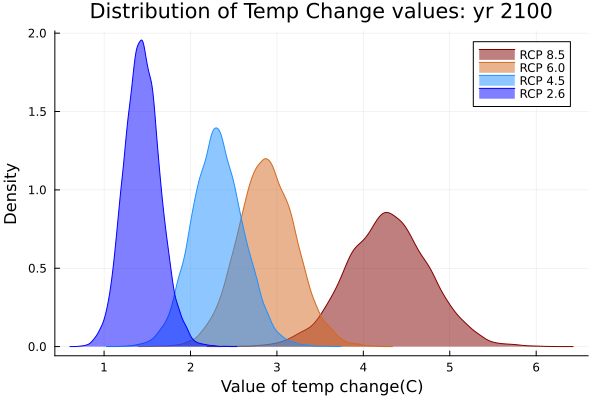

In [105]:
p = plot(k85.x, k85.density, label = "RCP 8.5", fill = (0, 0.5), color = :maroon)
plot!(p, k60.x, k60.density, label = "RCP 6.0", fill = (0, 0.5), color = :chocolate)
plot!(p, k45.x, k45.density, label = "RCP 4.5", fill = (0, 0.5), color = :dodgerblue)
plot!(p, k26.x, k26.density, label = "RCP 2.6", fill = (0, 0.5), color = :blue)
title!(string("Distribution of Temp Change values: yr 2100"))
xlabel!("Value of temp change(C)")
ylabel!("Density")




## Threshold work

### Collect Column Names

create a function to find the all trials that pass that threshold.

In [106]:


function thresh(tdf, tcha, yr_t)
    #create dict to house all colomn names and column values that pass within the threshhold
    colnames = Dict{Any, Any}()
    #set boundaries
    colr = collect(2:ncol(tdf))
    rowr = collect(1:nrow(tdf))
    # find the row for threshhold year
    tr = 0
    for r in rowr
        if tdf[r, 1] == yr_t
            tr = r
        end
    end
    # new row boundary
    rowt = collect(1:tr)

    for c in colr
        t = true
        for r in rowt
            if tdf[r, c] >= tcha
                t = false
            end
        end
        if t == true
            merge!(colnames, Dict(names(tdf, c)=> c))
        end
    end
    return colnames
end

thresh (generic function with 1 method)

Using RCP 4.5 data Check the values for 3, 2, and 1.5 degree increase

In [107]:
tres = thresh(dft45, 3, 2100)
dos = thresh(dft45, 2, 2100)
uno = thresh(dft45, 1.5, 2100)

Dict{Any, Any} with 1 entry:
  ["x9723"] => 9724

### Ready the Sealevel Rise Data

Normalize the sealevel data

In [108]:
function norm(df, ns, ne)
    #set boundaries
    colr = collect(2:ncol(df))
    rowr = collect(1:nrow(df))

    #create array list to house all years within the norm period
    normp = []
    #set normalization period
    for r in rowr
        if ns <= df[r,:year] <= ne
            push!(normp, r)
        end
    end
    
    # Set the index and array to solve for normalized value
    sarray = []
    i = 0

    # Add each value to a sum
    for r in normp
        for c in colr
            push!(sarray, df[r, c])
            i += 1
        end
    end

    # Collect the sum
    summ = 0
    for t in collect(1:i)
        summ += sarray[t]
    end
    # Divide by the number of terms(i)
    avg = summ / i
    
    # change the value for each instance
    for r in rowr
        for c in colr
            df[r, c] = (df[r, c] - avg)
        end
    end
    return df
end

norm (generic function with 1 method)

Chech with sealeavel rise data

In [109]:
norm(dfg45,1995,2014)

Row,year,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,⋯
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,1850,-0.183045,-0.153628,-0.212337,-0.282738,-0.175591,-0.176418,-0.207475,-0.232403,-0.0927018,-0.17745,-0.239724,-0.226715,-0.127615,-0.200793,-0.212472,-0.15969,-0.170466,-0.163081,-0.119629,-0.278626,-0.177129,-0.214511,-0.212047,-0.256331,-0.15106,-0.257793,-0.220869,-0.225117,-0.203925,-0.135154,-0.143649,-0.21276,-0.209745,-0.232998,-0.213106,-0.233148,-0.124622,-0.248203,-0.15615,-0.201099,-0.170278,-0.170123,-0.146863,-0.257682,-0.206229,-0.227246,-0.174182,-0.315675,-0.12363,-0.135728,-0.23158,-0.207131,-0.148718,-0.206232,-0.17159,-0.102673,-0.204682,-0.289686,-0.203832,-0.254801,-0.223215,-0.199536,-0.252379,-0.0876231,-0.231402,-0.200019,-0.268852,-0.108853,-0.280069,-0.268632,-0.188445,-0.24316,-0.141903,-0.175459,-0.226034,-0.159864,-0.186093,-0.152633,-0.125097,-0.183699,-0.228751,-0.171242,-0.123887,-0.246513,-0.23003,-0.205758,-0.13604,-0.246968,-0.174797,-0.254776,-0.178895,-0.151032,-0.166819,-0.169672,-0.200051,-0.183521,-0.22221,-0.180854,-0.100977,⋯
2,1851,-0.196136,-0.224527,-0.212048,-0.201734,-0.247264,-0.202493,-0.136682,-0.231281,-0.125453,-0.187984,-0.222287,-0.201574,-0.162178,-0.219073,-0.187292,-0.140258,-0.234843,-0.163319,-0.179615,-0.24484,-0.229347,-0.235555,-0.187174,-0.242484,-0.171012,-0.193766,-0.230789,-0.184129,-0.216588,-0.145222,-0.129679,-0.261525,-0.241726,-0.231613,-0.161528,-0.231348,-0.165318,-0.227939,-0.20724,-0.253075,-0.20933,-0.189244,-0.171773,-0.225757,-0.199652,-0.208623,-0.244841,-0.204002,-0.110601,-0.173023,-0.242272,-0.217736,-0.095423,-0.205974,-0.142711,-0.132691,-0.190944,-0.230126,-0.214207,-0.221265,-0.232408,-0.177512,-0.209089,-0.12951,-0.217484,-0.200556,-0.232218,-0.157768,-0.22601,-0.194946,-0.173834,-0.232228,-0.225467,-0.127219,-0.272714,-0.133583,-0.225601,-0.185952,-0.183234,-0.233864,-0.191142,-0.156973,-0.182724,-0.226462,-0.199373,-0.17366,-0.190195,-0.243791,-0.193885,-0.230949,-0.26838,-0.132856,-0.223161,-0.205875,-0.198454,-0.225092,-0.198175,-0.149733,-0.146034,⋯
3,1852,-0.239892,-0.249112,-0.183426,-0.216933,-0.262892,-0.244557,-0.179288,-0.218716,-0.12405,-0.184314,-0.198007,-0.192664,-0.145378,-0.217033,-0.216369,-0.140037,-0.251808,-0.177179,-0.203209,-0.235708,-0.228785,-0.229399,-0.183031,-0.1955,-0.207699,-0.210064,-0.21515,-0.164864,-0.235388,-0.136734,-0.12915,-0.214589,-0.250704,-0.220024,-0.211132,-0.186001,-0.144374,-0.24986,-0.15566,-0.2486,-0.195626,-0.157339,-0.156575,-0.203352,-0.169917,-0.23751,-0.232498,-0.208429,-0.156711,-0.166122,-0.204422,-0.236287,-0.0926688,-0.178829,-0.143233,-0.133352,-0.217044,-0.23437,-0.22991,-0.188512,-0.18623,-0.185304,-0.244142,-0.109412,-0.233224,-0.27668,-0.185961,-0.170322,-0.256733,-0.19872,-0.128831,-0.228271,-0.168998,-0.153163,-0.198496,-0.120496,-0.260502,-0.173134,-0.171587,-0.187737,-0.16861,-0.158982,-0.20674

### Get Values and Plot

create function to get values of sealevel rise for columns underneath the threshold

In [110]:
function valu(df, cnames, tyr)
    #set boundaries
    colr = collect(2:ncol(df))
    rowr = collect(1:nrow(df))
    
    vals = [] # this will house the values

    #initiate row
    rw = 0
    #calculate what row we are looking for
    for r in rowr
        if df[r,:year] == tyr
            rw = r
        end
    end

    for i in collect(values(cnames))
        push!(vals, df[rw, i])
    end
    return vals

end

valu (generic function with 1 method)

Grab the values for the three thresholds

In [111]:
t3 = Vector{Float64}(valu(dfg45, tres, 2100))
t2 = Vector{Float64}(valu(dfg45, dos, 2100))
t1 = Vector{Float64}(valu(dfg45, uno, 2100))

1-element Vector{Float64}:
 0.44593505720918986

grab their kde

In [112]:
kd3 = kde(t3)
kd2 = kde(t2)
kd1 = kde(t1)

UnivariateKDE{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}}}(-3.1540649427908103:0.0035173424523693214:4.04593505720919, [0.00029510134226282125, 0.0002951690219557823, 0.0002953043925909282, 0.0002955074766675947, 0.0002957783079374221, 0.0002961169314074086, 0.00029652340334376803, 0.00029699779127723147, 0.0002975401740089867, 0.000298150641617867  …  0.00029815064161792205, 0.0002975401740089472, 0.0002969977912772102, 0.000296523403343752, 0.0002961169314073908, 0.00029577830793744595, 0.0002955074766675366, 0.0002953043925909191, 0.00029516902195576237, 0.0002951013422628152])

Plot!!!

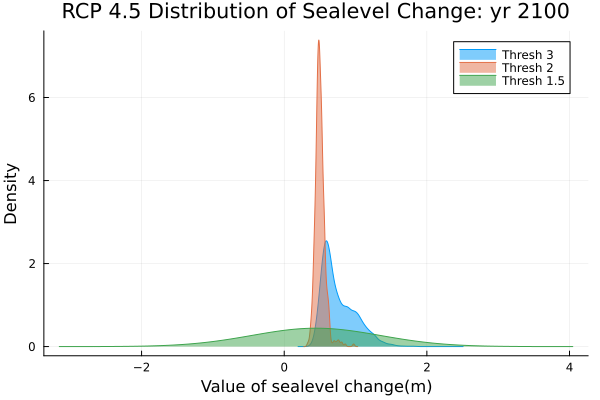

In [113]:
p = plot(kd3.x, kd3.density, label = "Thresh 3", fill = (0, 0.5))
plot!(p, kd2.x, kd2.density, label = "Thresh 2", fill = (0, 0.5))
plot!(p, kd1.x, kd1.density, label = "Thresh 1.5", fill = (0, 0.5))# wierd cuz 1.5 has just one value
title!(string("RCP 4.5 Distribution of Sealevel Change: yr 2100"))
xlabel!("Value of sealevel change(m)")
ylabel!("Density")

## CSV with Results

This is where I will pool the results from each RCP scenario for each Threshold(initially 2 and 3 degrees)

In [114]:
#calculate the diff values for threshhold 2 and three
etres = thresh(dft85, 3, 2100)
edos = thresh(dft85, 2, 2100)
stres = thresh(dft60, 3, 2100)
sdos = thresh(dft60, 2, 2100)
ttres = thresh(dft26, 3, 2100)
tdos = thresh(dft26, 2, 2100)
tres # rcp4.5 threshold three
dos # rcp4.5 threshold two

Dict{Any, Any} with 445 entries:
  ["x2464"] => 2465
  ["x415"]  => 416
  ["x6493"] => 6494
  ["x8137"] => 8138
  ["x6648"] => 6649
  ["x1735"] => 1736
  ["x404"]  => 405
  ["x2828"] => 2829
  ["x1012"] => 1013
  ["x4753"] => 4754
  ["x1754"] => 1755
  ["x7644"] => 7645
  ["x521"]  => 522
  ["x6387"] => 6388
  ["x8116"] => 8117
  ["x8650"] => 8651
  ["x2110"] => 2111
  ["x6011"] => 6012
  ["x7620"] => 7621
  ⋮         => ⋮

In [115]:
# normalize all files to 1995-2014

# gis files
norm(gis26,1995,2014)
norm(gis45,1995,2014)
norm(gis60,1995,2014)
norm(gis85,1995,2014)
# gic files
norm(gic26,1995,2014)
norm(gic45,1995,2014)
norm(gic60,1995,2014)
norm(gic85,1995,2014)
# lws files
norm(lws26,1995,2014)
norm(lws45,1995,2014)
norm(lws60,1995,2014)
norm(lws85,1995,2014)
# te files
norm(te26,1995,2014)
norm(te45,1995,2014)
norm(te60,1995,2014)
norm(te85,1995,2014)
# ais files
norm(ais26,1995,2014)
norm(ais45,1995,2014)
norm(ais60,1995,2014)
norm(ais85,1995,2014)

Row,year,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,⋯
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,1850,-0.0968841,-0.0617304,-0.110237,-0.191688,-0.0918131,-0.0916445,-0.101177,-0.143286,0.0104489,-0.0728564,-0.150136,-0.127889,-0.0203971,-0.11072,-0.135403,-0.042823,-0.117271,-0.0609536,-0.0858326,-0.150354,-0.11079,-0.100646,-0.128751,-0.163446,-0.053161,-0.132163,-0.144979,-0.0447097,-0.109771,-0.0678731,0.00512599,-0.135975,-0.136854,-0.108817,-0.117226,-0.129548,-0.0158618,-0.131754,-0.0420886,-0.0890446,-0.0853615,-0.0574077,-0.0196454,-0.170316,-0.0864863,-0.138235,-0.0891486,-0.171995,-0.0650892,-0.0796601,-0.137483,-0.0889139,-0.0708306,-0.0965256,-0.0813768,-0.0220589,-0.0903178,-0.165151,-0.132517,-0.148713,-0.112053,-0.0647518,-0.15588,0.00176465,-0.123587,-0.106406,-0.15402,-0.0218208,-0.155608,-0.116163,-0.101356,-0.181764,-0.0529554,-0.0825264,-0.134969,-0.050871,-0.125488,-0.0805911,0.00173872,-0.0714533,-0.102971,-0.110181,-0.0602382,-0.120844,-0.0930184,-0.136931,-0.0562,-0.146695,-0.0888384,-0.173507,-0.0936955,-0.0524941,-0.107063,-0.115321,-0.0993682,-0.112409,-0.153753,-0.0896234,0.0367104,⋯
2,1851,-0.135535,-0.115368,-0.0925469,-0.145669,-0.131642,-0.14262,-0.0573028,-0.135035,-0.0307654,-0.0744881,-0.10722,-0.125215,-0.0626957,-0.149373,-0.104077,-0.0624452,-0.135251,-0.0712196,-0.0904362,-0.146866,-0.136474,-0.121733,-0.0811037,-0.131031,-0.0841225,-0.133571,-0.134824,-0.0577773,-0.119334,-0.0466806,-0.0444824,-0.146382,-0.141216,-0.125938,-0.0925249,-0.126896,-0.0615078,-0.154142,-0.0733665,-0.128677,-0.117988,-0.0693964,-0.0594857,-0.130468,-0.0823787,-0.126669,-0.131634,-0.128164,-0.0445852,-0.0605826,-0.132905,-0.13068,-0.0317936,-0.0844275,-0.046477,-0.0548218,-0.125299,-0.128172,-0.121279,-0.116037,-0.134425,-0.0914239,-0.130626,-0.0398502,-0.128132,-0.153066,-0.115552,-0.0623355,-0.131289,-0.115562,-0.0627741,-0.165782,-0.102847,-0.0628826,-0.141412,-0.0377285,-0.126059,-0.116574,-0.0511261,-0.0821558,-0.0679702,-0.0816945,-0.0770025,-0.135359,-0.0662045,-0.112132,-0.0771008,-0.137603,-0.083755,-0.140092,-0.135773,-0.0273617,-0.133108,-0.138262,-0.104656,-0.109641,-0.138804,-0.0485334,-0.0128834,⋯
3,1852,-0.135533,-0.112842,-0.0913785,-0.144053,-0.130937,-0.14276,-0.0569973,-0.133571,-0.031244,-0.0740223,-0.1068,-0.12385,-0.0624965,-0.147669,-0.105669,-0.0625722,-0.134196,-0.0699529,-0.0889042,-0.147113,-0.135907,-0.122438,-0.0809628,-0.130347,-0.0828586,-0.131694,-0.133787,-0.0576117,-0.119313,-0.0457244,-0.0445075,-0.144575,-0.141821,-0.125526,-0.0920639,-0.125462,-0.061563,-0.152876,-0.0722454,-0.127492,-0.116317,-0.0685752,-0.0587571,-0.129804,-0.0820872,-0.125629,-0.129609,-0.126233,-0.0438997,-0.0608265,-0.132198,-0.130962,-0.0315512,-0.0847088,-0.0461955,-0.0546596,-0.126168,-0.127938,-0.120694,-0.114659,-0.133877,-0.0923827,-0.130578,-0.0398325,-0.125348,-0.151697,-0.114469,-0.0617107,-0.130836,-0.115666,-

Grab the data for respective files and thresholds

Complete the lengths of each component.

In [116]:
# create dfs for 3 degrees
dfGIS3 = DataFrame()
dfAIS3 = DataFrame()
dfGIC3 = DataFrame()
dfLWS3 = DataFrame()
dfTE3 = DataFrame()

0×0 DataFrame

In [117]:
function filldf(df, r2, d2, r4, d4, r6, d6, r8, d8)
    # grab column values
    a2 = collect(values(r2))
    a4 = collect(values(r4))
    a6 = collect(values(r6))
    a8 = collect(values(r8))
    df2 = DataFrame()
    df4 = DataFrame()
    df6 = DataFrame()
    df8 = DataFrame()
    t = 1
    # fill all the values for rcp 2.6
    for i in 1:length(collect(values(r2)))
        #cnum = a2[i] - 1
        #cname = "x$cnum"
        cname = "x$t"
        vals = Vector{Float64}()
        for j in 1:451
            push!(vals, d2[j, a2[i]])
        end
        df2[!, cname] = vals
        t += 1
    end
    # fill all the values for rcp 4.5
    for i in 1:length(collect(values(r4)))
        #cnum = a4[i] - 1
        cname = "x$t"
        vals = Vector{Float64}()
        for j in 1:451
            push!(vals, d4[j, a4[i]])
        end
        df4[!, cname] = vals
        t += 1
    end
    # fill all the values for rcp 6.0
    for i in 1:length(collect(values(r6)))
        #cnum = a6[i] - 1
        cname = "x$t"
        vals = Vector{Float64}()
        for j in 1:451
            push!(vals, d6[j, a6[i]])
        end
        df6[!, cname] = vals
        t += 1
    end
    # fill all the values for rcp 8.5
    for i in 1:length(collect(values(r8)))
        #cnum = a8[i] - 1
        cname = "x$t"
        vals = Vector{Float64}()
        for j in 1:451
            push!(vals, d8[j, a8[i]])
        end
        df8[!, cname] = vals
        t += 1
    end
    p1 = hcat(df2,df4)
    p2 = hcat(p1, df6)
    p3 = hcat(p2, df8)
    return p3
end

filldf (generic function with 2 methods)

In [118]:
#get component data frames with all rcp values that stayed under threshold 3 at 2100
dfGIS3 = filldf(dfGIS3, ttres, gis26, tres, gis45, stres, gis60, etres, gis85)
dfGIC3 = filldf(dfGIC3, ttres, gic26, tres, gic45, stres, gic60, etres, gic85)
dfAIS3 = filldf(dfAIS3, ttres, ais26, tres, ais45, stres, ais60, etres, ais85)
dfLWS3 = filldf(dfLWS3, ttres, lws26, tres, lws45, stres, lws60, etres, lws85)
dfTE3 = filldf(dfTE3, ttres, te26, tres, te45, stres, te60, etres, te85)


Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,⋯
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,-0.0537502,-0.0581209,-0.0314221,-0.0239855,-0.0115338,-0.0249886,-0.0921786,-0.0686843,-0.0560067,-0.0668598,-0.0178754,-0.0548836,-0.0779017,-0.0251211,-0.0218815,-0.0821126,-0.0393848,-0.0434972,-0.0363039,-0.0538462,-0.0558146,-0.0336501,-0.0713074,-0.0372614,-0.0285129,-0.0417948,-0.0258885,-0.0609191,-0.046192,-0.0830755,-0.0448589,-0.0203613,-0.0961248,-0.0423136,-0.047015,-0.0647083,-0.0485162,-0.0863206,-0.0169103,-0.0467524,-0.087127,-0.020031,-0.0558093,-0.075808,-0.0137141,-0.0989716,-0.0581181,-0.0270135,-0.0291737,-0.0324838,-0.100255,-0.0471877,-0.0300328,-0.0881794,-0.0240596,-0.0744492,-0.0526342,-0.0446387,-0.0446837,-0.0631927,-0.0931527,-0.0113025,-0.0515691,-0.0563428,-0.0300606,-0.00760178,-0.034879,-0.0404003,-0.0292703,-0.0405259,-0.0158482,-0.0425779,-0.0707767,-0.0786038,-0.0754408,-0.00682493,-0.0751002,-0.0350416,-0.02183,-0.02568,-0.0233323,-0.0447816,-0.0672878,-0.0465961,-0.0173492,-0.00379395,-0.0963784,-0.0560587,-0.00973814,-0.0490576,-0.0518855,-0.0317111,-0.0349874,-0.00997205,-0.0224119,-0.086193,-0.0334409,-0.0594241,-0.0636932,-0.0214467,⋯
2,-0.0532766,-0.0577815,-0.0310342,-0.0234973,-0.0112167,-0.024744,-0.0918726,-0.0683967,-0.0556656,-0.0664342,-0.0174248,-0.0545198,-0.0775508,-0.0246909,-0.0214721,-0.0816107,-0.0390234,-0.0431884,-0.0358842,-0.0534571,-0.0554489,-0.033374,-0.0709033,-0.036803,-0.0281784,-0.0414285,-0.0255092,-0.0605121,-0.0457219,-0.0827503,-0.0445251,-0.0200705,-0.0957575,-0.0418832,-0.046664,-0.0643476,-0.0481381,-0.0859376,-0.016527,-0.0463203,-0.0868174,-0.0196931,-0.0553342,-0.0754914,-0.0132616,-0.0986482,-0.0577697,-0.0266854,-0.0288501,-0.0321707,-0.0998848,-0.0468127,-0.0296031,-0.0878415,-0.0235955,-0.0740478,-0.0522714,-0.0443262,-0.0443356,-0.0628781,-0.0927642,-0.0108026,-0.0511985,-0.0560423,-0.0297709,-0.00711763,-0.0345792,-0.0399488,-0.0288882,-0.0402438,-0.0153764,-0.0422456,-0.0705255,-0.0783637,-0.0750911,-0.00643639,-0.0747455,-0.0346438,-0.0215749,-0.0252928,-0.0229807,-0.0443808,-0.0668827,-0.0462269,-0.0169914,-0.00321743,-0.0960924,-0.0555706,-0.00939992,-0.0487313,-0.0515267,-0.0312745,-0.0346221,-0.00949631,-0.0220768,-0.0858616,-0.0330909,-0.0590305,-0.0632893,-0.0210612,⋯
3,-0.0528164,-0.0574528,-0.0306574,-0.0230317,-0.0109022,-0.0245001,-0.0915692,-0.0681107,-0.0553316,-0.0660282,-0.0169966,-0.0541581,-0.0772262,-0.0242741,-0.0210742,-0.0811484,-0.0386639,-0.0428852,-0.0354678,-0.0530743,-0.0550905,-0.0331029,-0.0705196,-0.0363573,-0.0278493,-0.0410727,-0.0251419,-0.0601249,-0.045281,-0.0824239,-0.0441963,-0.019782,-0.0953963,-0.0414641,-0.0463224,-0.0639937,-0.0477736,-0.0855618,-0.0161548,-0.0459083,-0.086516,-0.019364,-0.0548834,-0.0751812,-0.0128253,-0.0983323,-0.0574276,-0.0263646,-0.0285272,-0.0318611,-0.0995246,-0.0464429,-0.0292019,-0.0875137,-0.023

In [119]:
# write csv thresh 3
CSV.write("dataFiles\\component_csv\\projections_greenland_t3_yr2100.csv", dfGIS3)
CSV.write("dataFiles\\component_csv\\projections_antarctic_t3_yr2100.csv", dfAIS3)
CSV.write("dataFiles\\component_csv\\projections_landwater_storage_sl_t3_yr2100.csv", dfLWS3)
CSV.write("dataFiles\\component_csv\\projections_thermal_t3_yr2100.csv", dfTE3)
CSV.write("dataFiles\\component_csv\\projections_glaciers_t3_yr2100.csv", dfGIC3)

"dataFiles\\component_csv\\projections_glaciers_t3_yr2100.csv"

In [120]:
# create dfs for 2 degrees
dfGIS2 = DataFrame()
dfAIS2 = DataFrame()
dfGIC2 = DataFrame()
dfLWS2 = DataFrame()
dfTE2 = DataFrame()

0×0 DataFrame

In [121]:
#get component data frames with all rcp values that stayed under threshold 2 at 2100
dfGIS2 = filldf(dfGIS2, tdos, gis26, dos, gis45, sdos, gis60, edos, gis85)
dfGIC2 = filldf(dfGIC2, tdos, gic26, dos, gic45, sdos, gic60, edos, gic85)
dfAIS2 = filldf(dfAIS2, tdos, ais26, dos, ais45, sdos, ais60, edos, ais85)
dfLWS2 = filldf(dfLWS2, tdos, lws26, dos, lws45, sdos, lws60, edos, lws85)
dfTE2 = filldf(dfTE2, tdos, te26, dos, te45, sdos, te60, edos, te85)

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,⋯
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,-0.0537502,-0.0581209,-0.0314221,-0.0239855,-0.0115338,-0.0921786,-0.0686843,-0.0560067,-0.0668598,-0.0178754,-0.0548836,-0.0779017,-0.0251211,-0.0218815,-0.0821126,-0.0393848,-0.0434972,-0.0363039,-0.0538462,-0.0558146,-0.0336501,-0.0713074,-0.0372614,-0.0285129,-0.0417948,-0.0258885,-0.0609191,-0.046192,-0.0830755,-0.0448589,-0.0203613,-0.0961248,-0.0423136,-0.047015,-0.0647083,-0.0485162,-0.0863206,-0.0169103,-0.0467524,-0.087127,-0.020031,-0.0558093,-0.075808,-0.0137141,-0.0581181,-0.0744492,-0.0270135,-0.0291737,-0.0324838,-0.100255,-0.0471877,-0.0300328,-0.0881794,-0.0240596,-0.0526342,-0.0446387,-0.0446837,-0.0631927,-0.0931527,-0.0113025,-0.0515691,-0.0563428,-0.00760178,-0.034879,-0.0404003,-0.0292703,-0.0405259,-0.0158482,-0.0425779,-0.0707767,-0.0786038,-0.0754408,-0.00682493,-0.0751002,-0.0350416,-0.02183,-0.02568,-0.0447816,-0.0672878,-0.0465961,-0.0173492,-0.00379395,-0.0963784,-0.0560587,-0.0490576,-0.0518855,-0.0317111,-0.0349874,-0.00997205,-0.0224119,-0.086193,-0.0334409,-0.0594241,-0.0636932,-0.0214467,-0.0371712,-0.0600459,-0.0709862,-0.0983726,-0.0873151,⋯
2,-0.0532766,-0.0577815,-0.0310342,-0.0234973,-0.0112167,-0.0918726,-0.0683967,-0.0556656,-0.0664342,-0.0174248,-0.0545198,-0.0775508,-0.0246909,-0.0214721,-0.0816107,-0.0390234,-0.0431884,-0.0358842,-0.0534571,-0.0554489,-0.033374,-0.0709033,-0.036803,-0.0281784,-0.0414285,-0.0255092,-0.0605121,-0.0457219,-0.0827503,-0.0445251,-0.0200705,-0.0957575,-0.0418832,-0.046664,-0.0643476,-0.0481381,-0.0859376,-0.016527,-0.0463203,-0.0868174,-0.0196931,-0.0553342,-0.0754914,-0.0132616,-0.0577697,-0.0740478,-0.0266854,-0.0288501,-0.0321707,-0.0998848,-0.0468127,-0.0296031,-0.0878415,-0.0235955,-0.0522714,-0.0443262,-0.0443356,-0.0628781,-0.0927642,-0.0108026,-0.0511985,-0.0560423,-0.00711763,-0.0345792,-0.0399488,-0.0288882,-0.0402438,-0.0153764,-0.0422456,-0.0705255,-0.0783637,-0.0750911,-0.00643639,-0.0747455,-0.0346438,-0.0215749,-0.0252928,-0.0443808,-0.0668827,-0.0462269,-0.0169914,-0.00321743,-0.0960924,-0.0555706,-0.0487313,-0.0515267,-0.0312745,-0.0346221,-0.00949631,-0.0220768,-0.0858616,-0.0330909,-0.0590305,-0.0632893,-0.0210612,-0.0368128,-0.059698,-0.0706103,-0.0979188,-0.0869165,⋯
3,-0.0528164,-0.0574528,-0.0306574,-0.0230317,-0.0109022,-0.0915692,-0.0681107,-0.0553316,-0.0660282,-0.0169966,-0.0541581,-0.0772262,-0.0242741,-0.0210742,-0.0811484,-0.0386639,-0.0428852,-0.0354678,-0.0530743,-0.0550905,-0.0331029,-0.0705196,-0.0363573,-0.0278493,-0.0410727,-0.0251419,-0.0601249,-0.045281,-0.0824239,-0.0441963,-0.019782,-0.0953963,-0.0414641,-0.0463224,-0.0639937,-0.0477736,-0.0855618,-0.0161548,-0.0459083,-0.086516,-0.019364,-0.0548834,-0.0751812,-0.0128253,-0.0574276,-0.0736612,-0.0263646,-0.0285272,-0.0318611,-0.0995246,-0.0464429,-0.0292019,-0.0875137,-0.0231557,-0.05191

In [122]:
# write csv thresh 2
CSV.write("dataFiles\\component_csv\\projections_greenland_t2_yr2100.csv", dfGIS2)
CSV.write("dataFiles\\component_csv\\projections_antarctic_t2_yr2100.csv", dfAIS2)
CSV.write("dataFiles\\component_csv\\projections_landwater_storage_sl_t2_yr2100.csv", dfLWS2)
CSV.write("dataFiles\\component_csv\\projections_thermal_t2_yr2100.csv", dfTE2)
CSV.write("dataFiles\\component_csv\\projections_glaciers_t2_yr2100.csv", dfGIC2)

"dataFiles\\component_csv\\projections_glaciers_t2_yr2100.csv"